# Exploratory and data analysis

## Questions to answer during this part
- What question(s) are you trying to solve?
- What kind of data do you have and how to treat different types?
- What’s missing from the data and how do you deal with it?
- Where are the outliers and why you should be paying attention to them?
- How can you add, change or remove features to get more out of your data?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

## Data import

In [2]:
DATADIR_Train = '/home/infres/abiapo/prim/data/CSV-01-12/01-12'
DATADIR_Test = '/home/infres/abiapo/prim/data/CSV-03-11/03-11'

### Training data import

In [3]:
dns = pd.read_csv(DATADIR_Train+'/DrDoS_DNS.csv',low_memory=False)
ldap = pd.read_csv(DATADIR_Train+'/DrDoS_LDAP.csv',low_memory=False)
mssql = pd.read_csv(DATADIR_Train+'/DrDoS_MSSQL.csv',low_memory=False)
netbios = pd.read_csv(DATADIR_Train+'/DrDoS_NetBIOS.csv',low_memory=False)
ntp = pd.read_csv(DATADIR_Train+'/DrDoS_NTP.csv',low_memory=False)
snmp = pd.read_csv(DATADIR_Train+'/DrDoS_SNMP.csv',low_memory=False)
ssdp = pd.read_csv(DATADIR_Train+'/DrDoS_SSDP.csv',low_memory=False)
udp = pd.read_csv(DATADIR_Train+'/DrDoS_UDP.csv',low_memory=False)
syn = pd.read_csv(DATADIR_Train+'/Syn.csv',low_memory=False)
tftp = pd.read_csv(DATADIR_Train+'/TFTP.csv',low_memory=False)
udplag = pd.read_csv(DATADIR_Train+'/UDPLag.csv',low_memory=False)

In [4]:
data = pd.concat([dns,ldap,mssql,netbios,ntp,snmp,ssdp,ssdp,udp,syn,tftp,udplag])

In [ ]:
#data.to_csv(DATADIR_Train+'/traindata.csv',header=True,index=False)

In [7]:
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [6]:
data = data.drop_duplicates()
data = data.dropna()

data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('/', '_')

In [8]:
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [15]:
len(data)

49814088

In [10]:
df_plot = data['Label'].value_counts().to_frame()
df_plot = df_plot.reset_index(level=0).rename(columns={'index':'Traffic'})
df_plot

,Traffic,Label
0,TFTP,20072108
1,DrDoS_SNMP,5159863
2,DrDoS_DNS,5071002
3,DrDoS_MSSQL,4522489
4,DrDoS_NetBIOS,4093273
5,DrDoS_UDP,3134643
6,DrDoS_SSDP,2610610
7,DrDoS_LDAP,2179928
8,Syn,1380015
9,DrDoS_NTP,1202639


<AxesSubplot:xlabel='Label', ylabel='Traffic'>

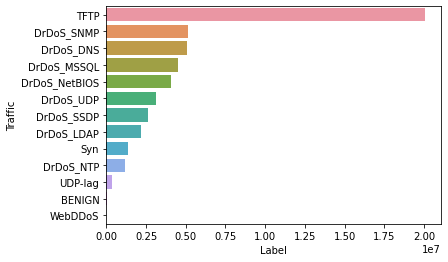

In [11]:
sns.barplot(data=df_plot, y="Traffic",x="Label")

In [37]:
data = data.drop(['Unnamed:_0'],axis=1)

In [14]:
data.isna().sum().sum()

0

In [ ]:
data.Label.loc[data.Label == "BENIGN"] = 0
data.Label.loc[data.Label != 0] = 1

In [ ]:
data['Label'].value_counts()

In [43]:
cnts = data['Label'].value_counts()
benign = cnts[0]
by_class = data.groupby('Label')

In [44]:
datasets = {}
for groups, dt in by_class:
    datasets[groups] = dt
a = datasets[1]
b = datasets[0]

In [64]:
smple = a.sample(n = benign) 
balance_data = pd.concat([b,smple])
balance_data = shuffle(balance_data)

In [65]:
balance_data['Source_IP'] = balance_data['Source_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
balance_data['Destination_IP'] = balance_data['Destination_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))

# Testing data import

In [ ]:
ldap_test = pd.read_csv(DATADIR_Test+'/LDAP.csv',low_memory=False)
mssql_test = pd.read_csv(DATADIR_Test+'/MSSQL.csv',low_memory=False)
netbios_test = pd.read_csv(DATADIR_Test+'/NetBIOS.csv',low_memory=False)
portmap_test = pd.read_csv(DATADIR_Test+'/Portmap.csv',low_memory=False)

In [17]:
udp_test = pd.read_csv(DATADIR_Test+'/UDP.csv',low_memory=False)
syn_test = pd.read_csv(DATADIR_Test+'/Syn.csv',low_memory=False)
udplag_test = pd.read_csv(DATADIR_Test+'/UDPLag.csv',low_memory=False)

In [19]:
data_test = pd.concat([ldap_test, mssql_test,netbios_test,portmap_test, udp_test, syn_test, udplag_test])
data_test.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,16171,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,80845,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [20]:
data_test = data_test.drop_duplicates()
data_test = data_test.dropna()

data_test.columns = data_test.columns.str.strip()
data_test.columns = data_test.columns.str.replace(' ', '_')
data_test.columns = data_test.columns.str.replace('/', '_')

In [21]:
df_plot_test = data_test['Label'].value_counts().to_frame()
df_plot_test = df_plot_test.reset_index(level=0).rename(columns={'index':'Traffic'})
df_plot_test

,Traffic,Label
0,MSSQL,5787449
1,Syn,4413031
2,UDP,3867155
3,NetBIOS,3657492
4,LDAP,1915122
5,Portmap,186960
6,BENIGN,52521
7,UDPLag,1873


<AxesSubplot:xlabel='Label', ylabel='Traffic'>

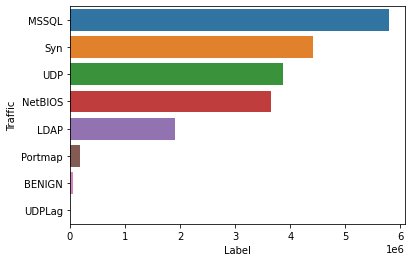

In [22]:
sns.barplot(data=df_plot_test, y="Traffic",x="Label")

In [23]:
len(data_test)

19881603

In [24]:
full_data = pd.concat([data,data_test])

In [25]:
full_df_plot = full_data['Label'].value_counts().to_frame()
full_df_plot = full_df_plot.reset_index(level=0).rename(columns={'index':'Traffic'})
full_df_plot

,Traffic,Label
0,TFTP,20072108
1,Syn,5793046
2,MSSQL,5787449
3,DrDoS_SNMP,5159863
4,DrDoS_DNS,5071002
5,DrDoS_MSSQL,4522489
6,DrDoS_NetBIOS,4093273
7,UDP,3867155
8,NetBIOS,3657492
9,DrDoS_UDP,3134643


<AxesSubplot:xlabel='Label', ylabel='Traffic'>

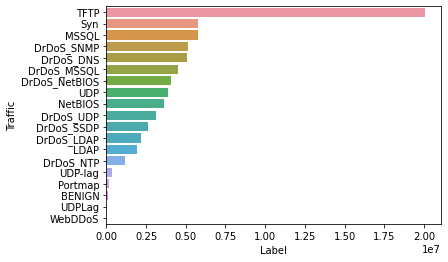

In [26]:
sns.barplot(data=full_df_plot, y="Traffic",x="Label")

In [27]:
full_data['label'] = full_data['Label'].apply(lambda x : 0 if x=='BENIGN' else 1)

In [28]:
full_data

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label,label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS,1
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS,1
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS,1
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS,1
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725160,587239,172.16.0.5-192.168.50.4-38133-51501-6,172.16.0.5,38133,192.168.50.4,51501,6,2018-11-03 11:30:25.829961,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn,1
725161,240180,172.16.0.5-192.168.50.4-38134-22514-6,172.16.0.5,38134,192.168.50.4,22514,6,2018-11-03 11:30:25.830168,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn,1
725162,12919,172.16.0.5-192.168.50.4-38135-54928-6,172.16.0.5,38135,192.168.50.4,54928,6,2018-11-03 11:30:25.830169,105,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn,1
725163,500419,172.16.0.5-192.168.50.4-38136-50486-6,172.16.0.5,38136,192.168.50.4,50486,6,2018-11-03 11:30:25.830219,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn,1


In [30]:
full_data['label'].value_counts()

1    69586420
0      109271
Name: label, dtype: int64

In [31]:
cnts = full_data['label'].value_counts()
benign = cnts[0]
by_class = full_data.groupby('label')

In [32]:
datasets = {}
for groups, dt in by_class:
    datasets[groups] = dt
a = datasets[1]
b = datasets[0]

In [33]:
smple = a.sample(n = benign) 
balance_data = pd.concat([b,smple])
balance_data = shuffle(balance_data)

In [ ]:
balance_data

In [35]:
balance_data['Label'].value_counts().to_frame()

,Label
BENIGN,109271
TFTP,31468
Syn,9174
MSSQL,9146
DrDoS_SNMP,8021
DrDoS_DNS,7940
DrDoS_MSSQL,6991
DrDoS_NetBIOS,6436
UDP,6073
NetBIOS,5674


In [38]:
balance_data.to_csv('/home/infres/abiapo/prim/data/balance_mix_data.csv',header=True,index=False)

In [44]:
n1 = round(benign*6/4)

In [45]:
smple = a.sample(n = n1) 
unbalance_data_40_60 = pd.concat([b,smple])
unbalance_data_40_60 = shuffle(unbalance_data_40_60)

In [56]:
unbalance_data_40_60.to_csv('/home/infres/abiapo/prim/data/unbalance_mix_data_40_60.csv',header=True,index=False)

In [55]:
unbalance_data_40_60['Label'].value_counts().to_frame()

,Label
BENIGN,109271
TFTP,47383
Syn,13694
MSSQL,13630
DrDoS_DNS,12035
DrDoS_SNMP,11988
DrDoS_MSSQL,10566
DrDoS_NetBIOS,9687
UDP,9181
NetBIOS,8736


In [46]:
n2 = round(benign*7/3)

In [47]:
smple = a.sample(n = n2) 
unbalance_data_30_70 = pd.concat([b,smple])
unbalance_data_30_70 = shuffle(unbalance_data_30_70)

In [57]:
unbalance_data_30_70.to_csv('/home/infres/abiapo/prim/data/unbalance_mix_data_30_70.csv',header=True,index=False)

In [50]:
unbalance_data_30_70['Label'].value_counts().to_frame()

,Label
BENIGN,109271
TFTP,73409
Syn,21368
MSSQL,21208
DrDoS_SNMP,18744
DrDoS_DNS,18401
DrDoS_MSSQL,16728
DrDoS_NetBIOS,14872
UDP,14086
NetBIOS,13530


In [48]:
n3 = round(benign*4)

In [49]:
smple = a.sample(n = n3) 
unbalance_data_20_80 = pd.concat([b,smple])
unbalance_data_20_80 = shuffle(unbalance_data_20_80)

In [58]:
unbalance_data_20_80.to_csv('/home/infres/abiapo/prim/data/unbalance_mix_data_20_80.csv',header=True,index=False)

In [51]:
unbalance_data_20_80['Label'].value_counts().to_frame()

,Label
TFTP,126409
BENIGN,109271
Syn,36478
MSSQL,36139
DrDoS_SNMP,32620
DrDoS_DNS,31522
DrDoS_MSSQL,28493
DrDoS_NetBIOS,25666
UDP,24114
NetBIOS,23014


# Feature selection 

In [ ]:
DATADIR = '/home/infres/abiapo/prim/data'